In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')
ANO12 = open_s3fs('moorings_/AON_WH_ADCP_BS3_2012_2013.nc')

HE40 = open_s3fs('moorings_chukchi_sea/HSNE40_2013_14_currents.nc')
HE50 = open_s3fs('moorings_chukchi_sea/HSNE50_2013_14_currents.nc')
HE60 = open_s3fs('moorings_chukchi_sea/HSNE60_2013_14_currents.nc')
HW40 = open_s3fs('moorings_chukchi_sea/HSNW40_2013_14_currents.nc')
HW50 = open_s3fs('moorings_chukchi_sea/HSNW50_2013_14_currents.nc')

'''
#Thes didn't work, didnt have depth
RCM17 = open_s3fs('moorings_RCM/1747_RCM_11092_QC.nc')
RCM02 = open_s3fs('moorings_RCM/0200_RCM_3163_QC.nc')
RCM04 = open_s3fs('moorings_RCM/0491_RCM_8003_QC.nc')
RCM11 = open_s3fs('moorings_RCM/1157_RCM_8006_QC.nc')
'''

"\n#Thes didn't work, didnt have depth\nRCM17 = open_s3fs('moorings_RCM/1747_RCM_11092_QC.nc')\nRCM02 = open_s3fs('moorings_RCM/0200_RCM_3163_QC.nc')\nRCM04 = open_s3fs('moorings_RCM/0491_RCM_8003_QC.nc')\nRCM11 = open_s3fs('moorings_RCM/1157_RCM_8006_QC.nc')\n"

In [6]:
scalar = open_s3fs('CREG12.L75-REF08_mesh_hgr.nc')

In [7]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.57541,79.37209),
          (5.48733,80.03876),
          (5.56333,79.44093),
          (-160.4923,72.121),
          (-159.1216,72.1628),
          (-158.5512,72.1815),
          (-163.5346,72.2808),
          (-164.0992,72.5252)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (935, 143),
            (938, 144),
            (934, 141),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978),
            (334, 978),
            (334, 978),
            (334, 978),
            (409, 992), 
            (399, 987), 
            (395, 985), 
            (434, 997), 
            (440, 993)]
c_list = ['c', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'gold', 'peru','deeppink',
          'gold','peru','dodgerblue','c','m']

In [8]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u12 = ANO12.UCUR.isel(BINDEPTH=slice(0,5)).fillna(0) #.isel(TIME=slice(),BINDEPTH=slice())
v12 = ANO12.VCUR.isel(BINDEPTH=slice(0,5)).fillna(0)
u14 = ANO14.UCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
u18 = u18.isel(BINDEPTH=slice(1,-1)).fillna(0)
v18 = v18.isel(BINDEPTH=slice(1,-1)).fillna(0)

# Chukchi 
ue40 = HE40.u_velocity.isel(z=slice(2,-1)).fillna(0).squeeze(axis=2)
ve40 = HE40.v_velocity.isel(z=slice(2,-1)).fillna(0).squeeze(axis=2)
ue50 = HE50.u_velocity.isel(z=slice(4,-1)).fillna(0).squeeze(axis=2)
ve50 = HE50.v_velocity.isel(z=slice(4,-1,)).fillna(0).squeeze(axis=2)
ue60 = HE60.u_velocity.isel(z=slice(9,-1)).fillna(0).squeeze(axis=2)
ve60 = HE60.v_velocity.isel(z=slice(9,-1)).fillna(0).squeeze(axis=2)
uw40 = HW40.u_velocity.isel(z=slice(1,-1)).fillna(0).squeeze(axis=2)
vw40 = HW40.v_velocity.isel(z=slice(1,-1)).fillna(0).squeeze(axis=2)
uw50 = HW50.u_velocity.isel(z=slice(4,-1)).fillna(0).squeeze(axis=2)
vw50 = HW50.v_velocity.isel(z=slice(4,-1)).fillna(0).squeeze(axis=2)

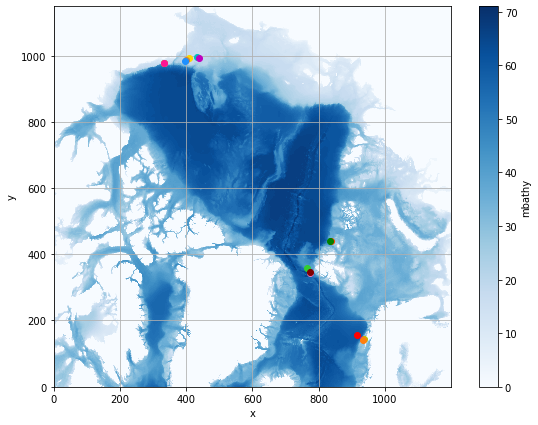

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap('Blues'))
for i,p in enumerate(moor_l):
    ax.plot(p[0], p[1], marker='o', color=c_list[i])
ax.grid('on')
ax.set_aspect('equal')

In [10]:
vel_l = [(u13,v13),(u15,v15),(u17,v17), 
         (ub,vb),(uw,vw),(un,vn),(us,vs),
         (u1,v1),(u2,v2),(u3,v3),
         (u12,v12),(u14,v14),(u16,v16),(u18,v18),
        (ue40,ve40),(ue50,ve50),(ue60,ve60),(uw40,vw40),(uw50,vw50)]

# Horizontal ellipses

- Not satisfied yet... something is off.. The major and minor axis are off approximate the same size, should not be. 
- Somthing off with code or is this just how the data is?

In [11]:
def ellipser_nDEPTH(u,v,depth):
    
    s = 1
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [12]:
def ellipser_DEPTH(u,v,depth):
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [13]:
def ellipser_BINDEPTH(u,v,depth):
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [14]:
def ellipser_z(u,v,depth):
    
    s = 1
    
    covm = np.cov(np.vstack([u.isel(z=depth).values,v.isel(z=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

## Moorings in Lofoten basin

3
[[ 0.02308351 -0.00068332]
 [-0.00068332  0.02477874]]
vec:  [[ 0.33277508 -0.94300623]
 [-0.94300623 -0.33277508]] val:  [0.02501988 0.02284238]
Ellipse(xy=(915, 157), width=31.63534496790766, height=30.227391038467744, angle=-70.56270170898479)
4
[[0.01703917 0.01291594]
 [0.01291594 0.02406148]]
vec:  [[-0.60731941 -0.79445776]
 [-0.79445776  0.60731941]] val:  [0.03393501 0.00716563]
Ellipse(xy=(935, 143), width=36.84291370105705, height=16.930013412181687, angle=-127.39593026995456)
5
[[0.02359162 0.01682614]
 [0.01682614 0.0204226 ]]
vec:  [[ 0.7395116  -0.67314382]
 [ 0.67314382  0.7395116 ]] val:  [0.03890769 0.00510652]
Ellipse(xy=(938, 144), width=39.450065660086516, height=14.291990051707185, angle=42.31017219462407)
6
[[0.02184024 0.01269402]
 [0.01269402 0.01989545]]
vec:  [[ 0.73361388 -0.67956654]
 [ 0.67956654  0.73361388]] val:  [0.03359906 0.00813663]
Ellipse(xy=(934, 141), width=36.660091642141566, height=18.040658521876665, angle=42.80977987812184)


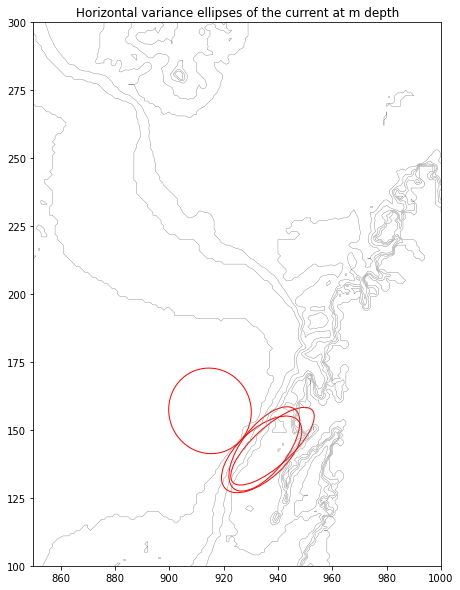

In [15]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4,5,6]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 20

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_ = ellipser_DEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()

## Moorings Yermark

7
[[ 0.01687768 -0.00127147]
 [-0.00127147  0.01807876]]
vec:  [[ 0.5352206  -0.84471232]
 [-0.84471232 -0.5352206 ]] val:  [0.01888438 0.01607205]
Ellipse(xy=(774, 344), width=27.48409099285936, height=25.35511990959538, angle=-57.6411267258727)
8
[[0.01986385 0.00027458]
 [0.00027458 0.02084025]]
vec:  [[-0.25337845 -0.96736723]
 [-0.96736723  0.25337845]] val:  [0.02091217 0.01979193]
Ellipse(xy=(766, 358), width=28.922084461421377, height=28.13675761280282, angle=-104.67752185796873)
9
[[ 0.01839062 -0.00209411]
 [-0.00209411  0.01841912]]
vec:  [[ 0.70469639 -0.70950898]
 [-0.70950898 -0.70469639]] val:  [0.02049903 0.01631071]
Ellipse(xy=(773, 346), width=28.634962732689946, height=25.542680467956362, angle=-45.194978666333064)


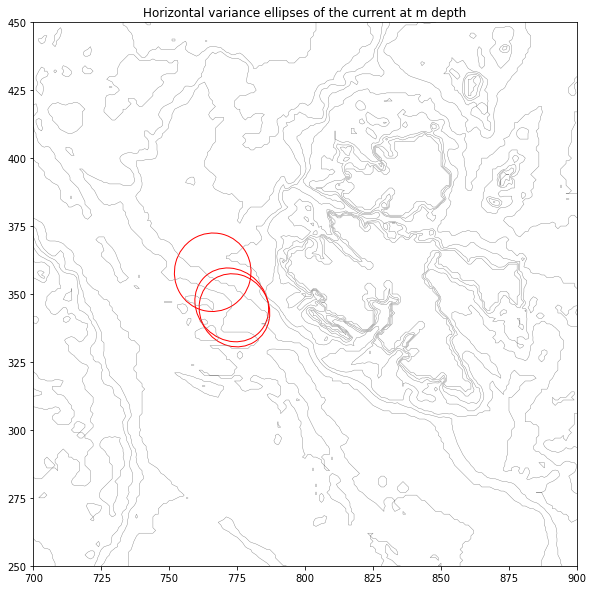

In [16]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [7,8,9]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 10

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_ = ellipser_DEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(700,900)
ax.set_ylim(250,450)
ax.set_aspect('equal')
plt.show()

## Moorings Barents sea

[[311.83192231 -49.76589442]
 [-49.76589442 419.74726343]]
vec:  [[ 0.36394846 -0.93141909]
 [-0.93141909 -0.36394846]] val:  [439.19309728 292.38608846]
Ellipse(xy=(836, 440), width=41.91386869642581, height=34.19860163580152, angle=-68.6571163209037)
[[266.74591146 -17.72404345]
 [-17.72404345 360.90256084]]
vec:  [[ 0.17906278 -0.98383765]
 [-0.98383765 -0.17906278]] val:  [364.12841462 263.52005767]
Ellipse(xy=(838, 440), width=38.16429821835704, height=32.46660177317771, angle=-79.68482612347172)
[[225.60016164 -41.1604994 ]
 [-41.1604994  268.52419078]]
vec:  [[ 0.51848559 -0.85508636]
 [-0.85508636 -0.51848559]] val:  [293.48205105 200.64230136]
Ellipse(xy=(836, 439), width=34.26263568690589, height=28.329652406259704, angle=-58.7692771520176)


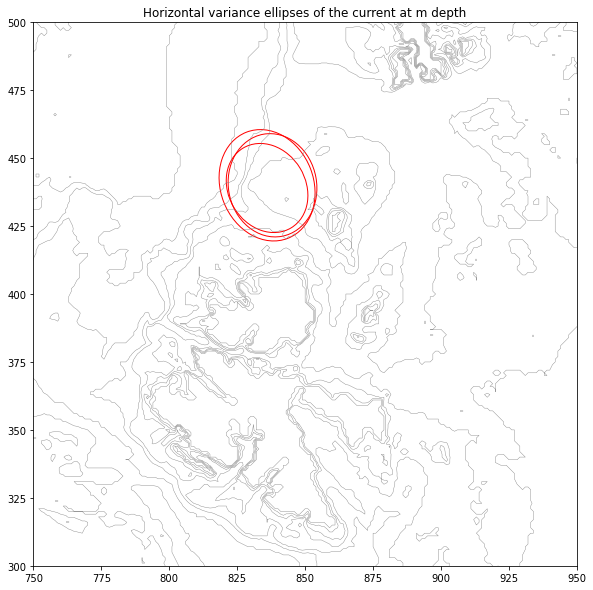

In [17]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [0,1,2]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2
    
    maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(750,950)
ax.set_ylim(300,500)
ax.set_aspect('equal')
plt.show()

## Moorings Beaufort sea

[[ 0.03192181 -0.01010276]
 [-0.01010276  0.00737772]]
vec:  [[ 0.94128692  0.33760766]
 [-0.33760766  0.94128692]] val:  [0.03554533 0.0037542 ]
Ellipse(xy=(334, 978), width=37.7069372533912, height=12.254311467835146, angle=-19.731186576898775)
[[ 0.02942318 -0.02255391]
 [-0.02255391  0.022193  ]]
vec:  [[ 0.76100801  0.64874249]
 [-0.64874249  0.76100801]] val:  [0.04864989 0.00296629]
Ellipse(xy=(334, 978), width=44.1134401505896, height=10.892732030977838, angle=-40.44685780260724)
[[ 0.02924355 -0.02042314]
 [-0.02042314  0.01726024]]
vec:  [[ 0.80047202  0.59937012]
 [-0.59937012  0.80047202]] val:  [0.0445358  0.00196799]
Ellipse(xy=(334, 978), width=42.207013554573805, height=8.872401432243882, angle=-36.82479923024254)
[[ 0.03236038 -0.01516241]
 [-0.01516241  0.00932714]]
vec:  [[ 0.89578352  0.44449059]
 [-0.44449059  0.89578352]] val:  [0.03988401 0.00180351]
Ellipse(xy=(334, 978), width=39.94196509907251, height=8.493542278004975, angle=-26.390751329701658)


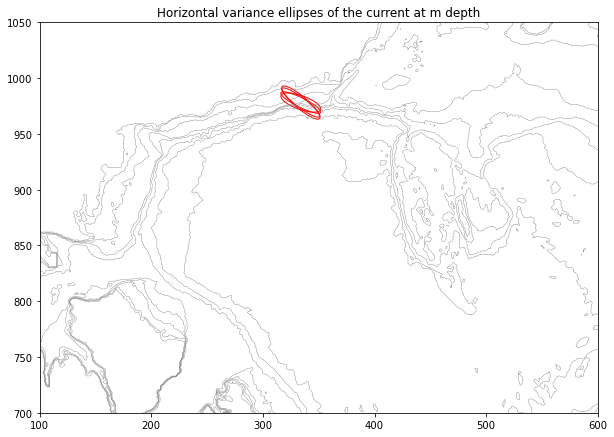

In [18]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [10,11,12,13]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2

    maj_, min_, theta_ = ellipser_BINDEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(100,600)
ax.set_ylim(700,1050)
ax.set_aspect('equal')
plt.show()

## Moorings Chukchi sea 

[[88.77107454  2.10609722]
 [ 2.10609722 67.29655301]]
vec:  [[ 0.99531421 -0.0966934 ]
 [ 0.0966934   0.99531421]] val:  [88.97567899 67.09194857]
Ellipse(xy=(409, 992), width=18.865384065699175, height=16.381934997538853, angle=5.548793515976022)
[[136.20031679   4.05250756]
 [  4.05250756 111.86362906]]
vec:  [[ 0.98710882 -0.16005056]
 [ 0.16005056  0.98710882]] val:  [136.85739339 111.20655247]
Ellipse(xy=(399, 987), width=23.397212943999616, height=21.09090348628746, angle=9.209830851309968)
[[63.22329568 -9.50588821]
 [-9.50588821 53.9218377 ]]
vec:  [[ 0.84837193  0.52940067]
 [-0.52940067  0.84837193]] val:  [69.15515573 47.98997765]
Ellipse(xy=(395, 985), width=16.631915792788654, height=13.854959782766608, angle=-31.964969296342275)
[[244.70772356  17.4822077 ]
 [ 17.4822077  240.78761869]]
vec:  [[ 0.74545922 -0.66655124]
 [ 0.66655124  0.74545922]] val:  [260.33941326 225.15592898]
Ellipse(xy=(434, 997), width=32.27007364472303, height=30.01039346511758, angle=41.801442503

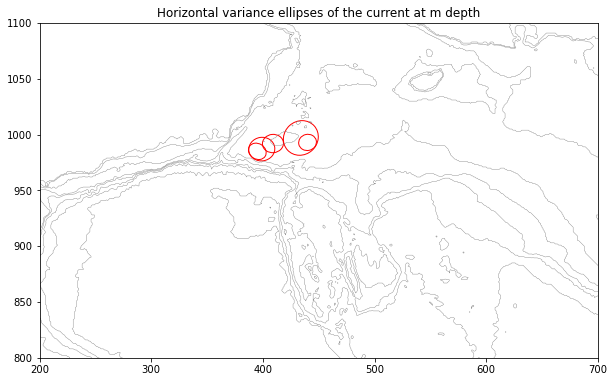

In [19]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [14,15,16,17,18]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2

    maj_, min_, theta_ = ellipser_z(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(200,700)
ax.set_ylim(800,1100)
ax.set_aspect('equal')
plt.show()

# Vertical PC

In [21]:
def PCz(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

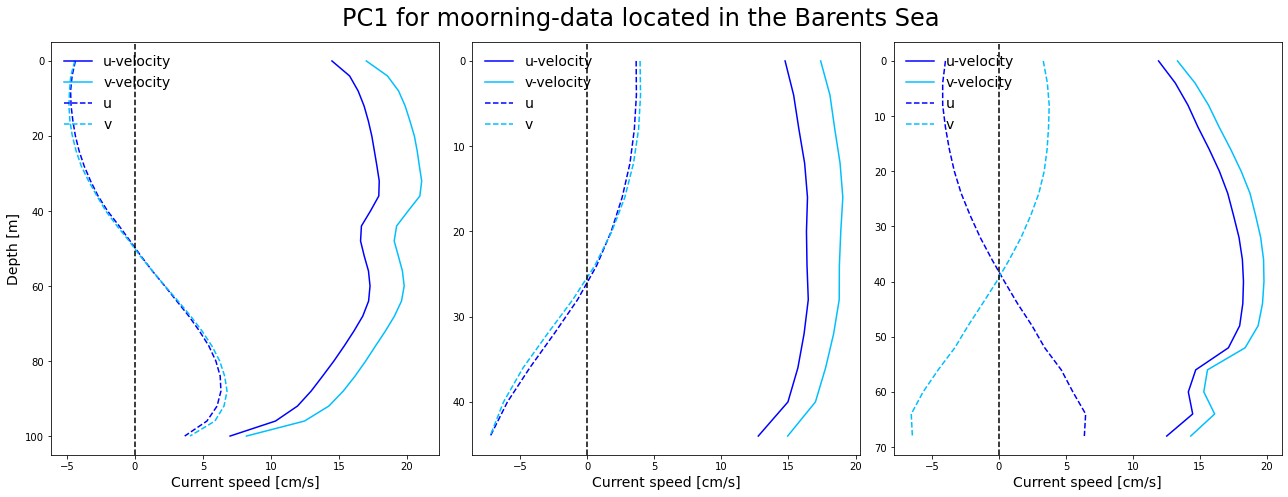

In [22]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
bar = [(u13,v13),(u15,v15),(u17,v17)]
plt.suptitle('PC1 for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, bar):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.nDEPTH*4, label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.nDEPTH*4, label= 'v-velocity', color='deepskyblue')
    axs.plot(np.sqrt(valu[1])*vecu[:,1],U.nDEPTH*4, linestyle = '--',label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[1])*vecv[:,1],V.nDEPTH*4, linestyle = '--',label= 'v-velocity', color='deepskyblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

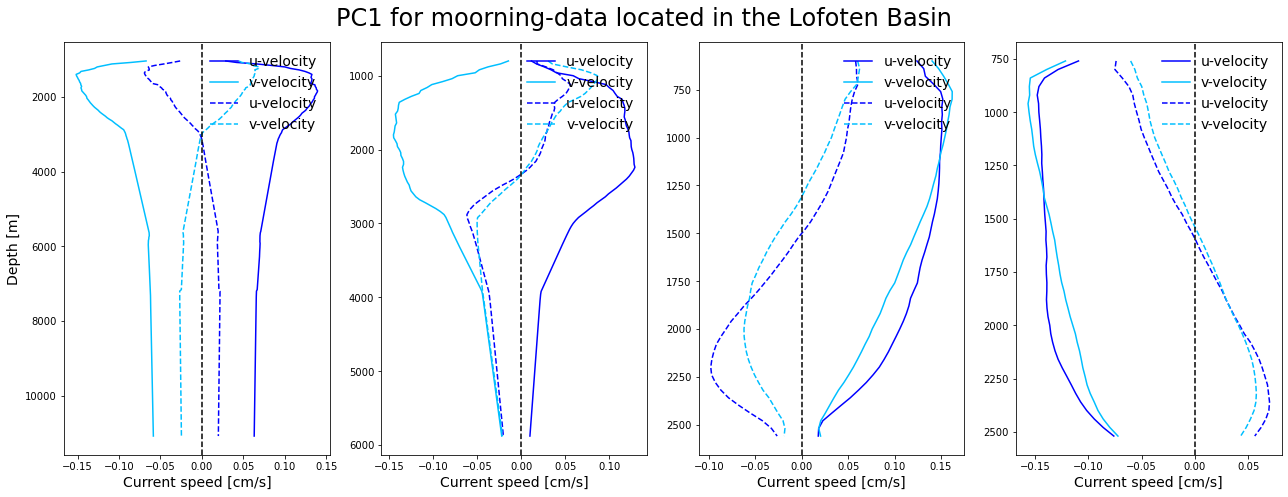

In [23]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(18,7))
plt.suptitle('PC1 for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)
lof = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, lof):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH*4, label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH*4, label= 'v-velocity', color='deepskyblue')
    axs.plot(np.sqrt(valu[1])*vecu[:,1],U.DEPTH*4, linestyle = '--',label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[1])*vecv[:,1],V.DEPTH*4, linestyle = '--',label= 'v-velocity', color='deepskyblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

In [24]:
def PCz_yermark(data):
    cov = np.cov(data, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

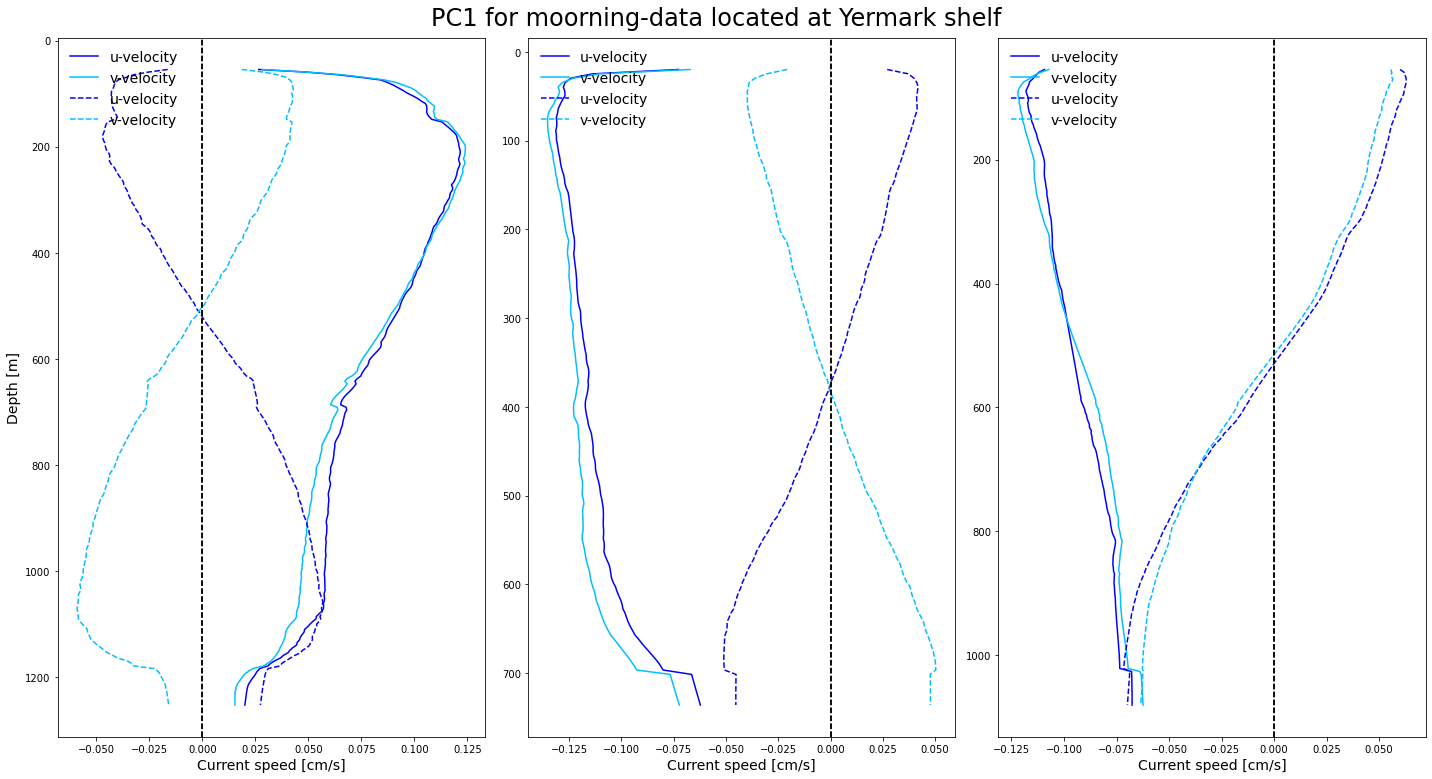

In [25]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
yer = [(u1,v1),(u2,v2),(u3,v3)]
plt.suptitle('PC1 for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yer):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz_yermark(U)
    valv, vecv = PCz_yermark(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= 'v-velocity', color='deepskyblue')
    axs.plot(np.sqrt(valu[1])*vecu[:,1],U.DEPTH, linestyle = '--',label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[1])*vecv[:,1],V.DEPTH, linestyle = '--',label= 'v-velocity', color='deepskyblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

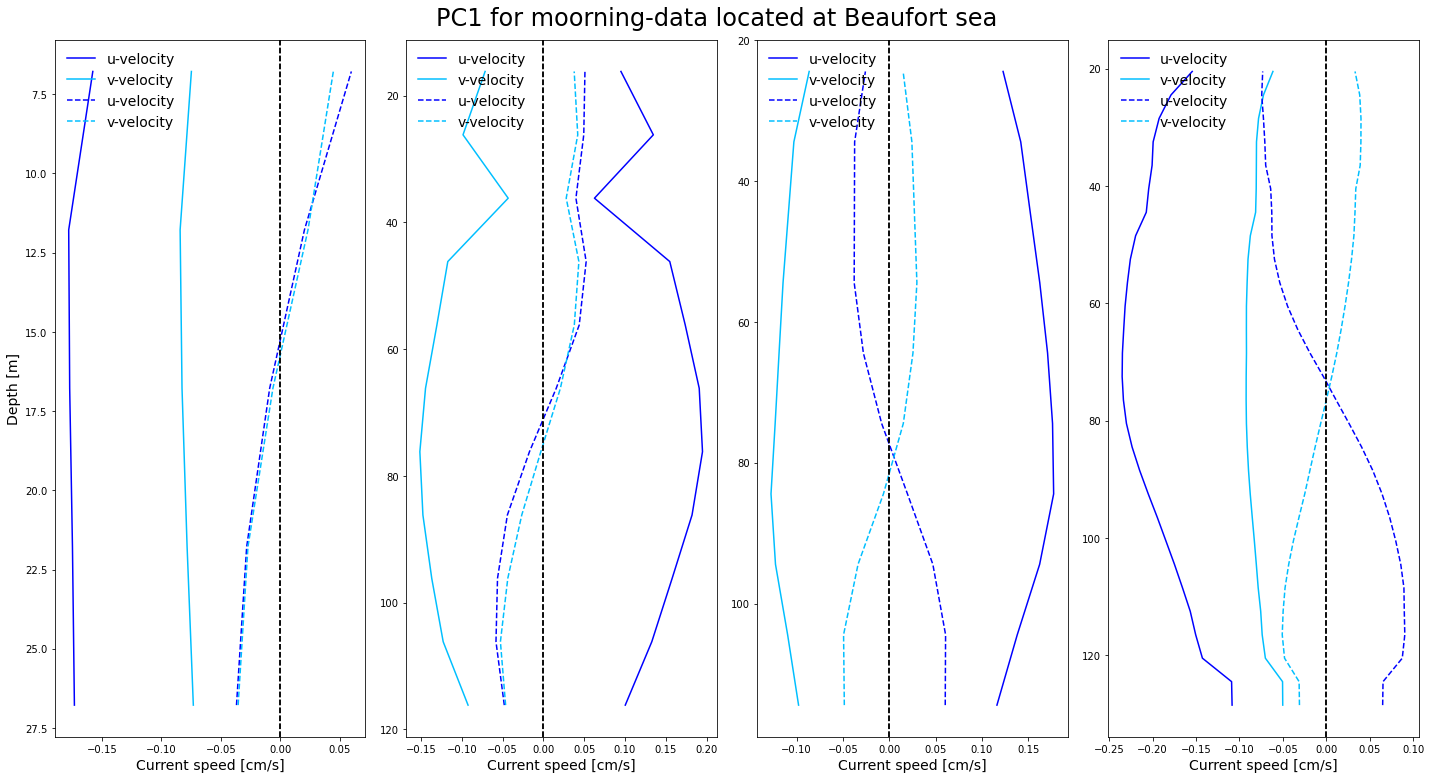

In [26]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
ANO = [(u12,v12),(u14,v14),(u16,v16),(u18,v18)]
plt.suptitle('PC1 for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, ANO):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.BINDEPTH, label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.BINDEPTH, label= 'v-velocity', color='deepskyblue')
    axs.plot(np.sqrt(valu[1])*vecu[:,1],U.BINDEPTH, linestyle = '--',label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[1])*vecv[:,1],V.BINDEPTH, linestyle = '--',label= 'v-velocity', color='deepskyblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

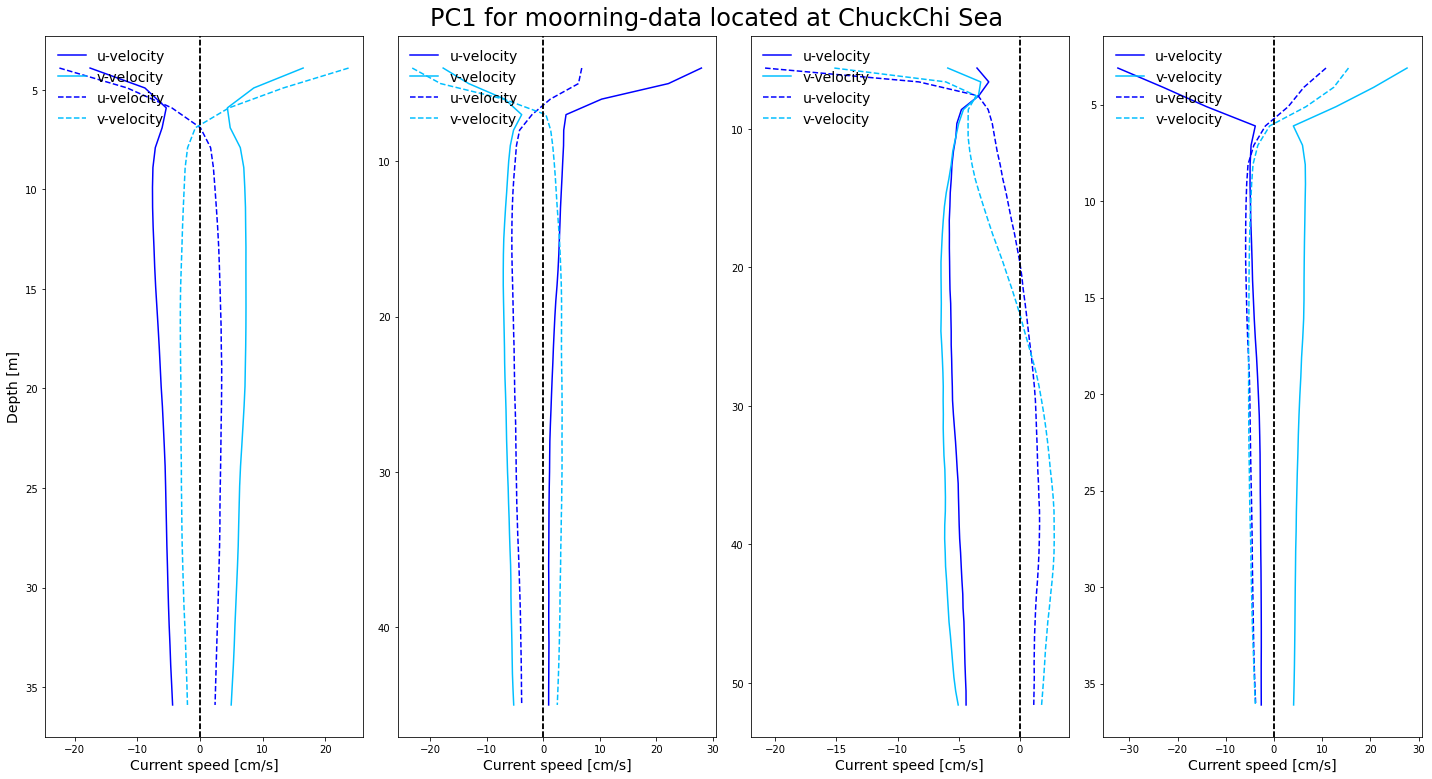

In [27]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
CC = [(ue40,ve40),(ue50,ve50),(ue60,ve60),(uw40,vw40),(uw50,vw50)]
plt.suptitle('PC1 for moorning-data located at ChuckChi Sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, CC):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.z, label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.z, label= 'v-velocity', color='deepskyblue')
    axs.plot(np.sqrt(valu[1])*vecu[:,1],U.z, linestyle = '--',label= 'u-velocity', color='b')
    axs.plot(np.sqrt(valv[1])*vecv[:,1],V.z, linestyle = '--',label= 'v-velocity', color='deepskyblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

# Vertical PC parallell and orthogonal

In [28]:
# glamt: horizontal scale factors for latitude at the mid point og griddcell
# gphit: horizontal scale factors --''--
zonal_ = scalar.glamt.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)
merd_ = scalar.gphit.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)

In [29]:
d_hbx = bathym.isel(y=slice(0,1149)).diff(dim='x')
d_hby = bathym.isel(x=slice(0,1199)).diff(dim='y')

d_hbxg = d_hbx.rolling(x= 10,).mean()
d_hbyg = d_hby.rolling(y= 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal_)**2 + (d_hbyg/merd_)**2)

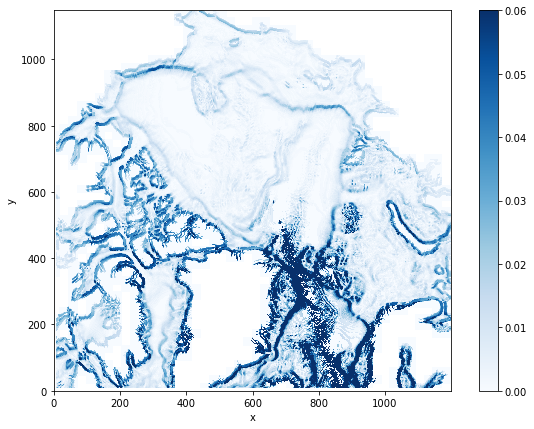

In [30]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,1,figsize=(10,7))
c = len_batg.plot(vmin=0, vmax=0.06, add_colorbar=False, cmap=plt.get_cmap('Blues'))
axs.set_aspect('equal')
fig.colorbar(c)

In [31]:
'Making a function for the vertical PC'
def PCz_op(up,vp,x,y):
    
    zonalp = zonal_.isel(y=y, x=x)
    merdp = merd_.isel(y=y, x=x)

    d_hbx_p = d_hbxg.isel(y=y, x=x)
    d_hby_p = d_hbyg.isel(y=y, x=x)
    
    # lag lengde scalar av bathym og dele u_o og u_p på 
    # prøvd: np.sqrt(d_hbx_p**2/zonalp**2 + d_hby_p**2/merdp**2))
    # funket ikke : (np.sqrt(d_hbx_p**2 + d_hby_p**2)*np.sqrt(zonalp**2 + merdp**2)))

    vel_ort = (up*(d_hbx_p/zonalp) + vp*(d_hby_p/merdp))/(np.sqrt((d_hbx_p/zonalp)**2 + (d_hby_p/merdp)**2)) #så og si samme amplitude med denne  
    vel_par = (up*(d_hby_p/merdp)  - vp*(d_hbx_p/zonalp))/(np.sqrt((d_hbx_p/zonalp)**2 + (d_hby_p/merdp)**2))
    
    cov_o = np.cov(vel_ort.T, bias=True) # uten .T ble den en 73x73 matrise 
    cov_p = np.cov(vel_par.T, bias=True)
    
    values_o, vectors_o = np.linalg.eig(cov_o)
    order_o = values_o.argsort()[::-1]
    values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
    values_p, vectors_p = np.linalg.eig(cov_p)
    order_p = values_p.argsort()[::-1]
    values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]
    
    PC1p = (np.sqrt(values_p[0])*vectors_p[:,0])
    PC1o = (np.sqrt(values_o[0])*vectors_o[:,0])
    PC2p = (np.sqrt(values_p[1])*vectors_p[:,1])
    PC2o = (np.sqrt(values_o[1])*vectors_o[:,1])
    
    return PC1p, PC1o, PC2p, PC2o

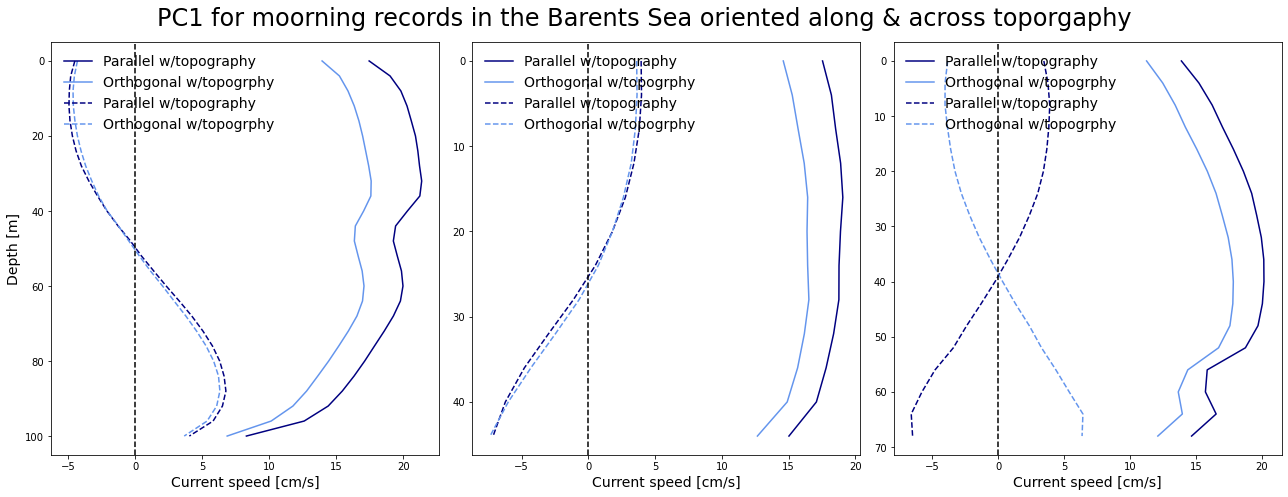

In [32]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
yl = [(u13,v13),(u15,v15),(u17,v17)]
m_l = [(836, 440),(838, 440),(836, 439)]
plt.suptitle('PC1 for moorning records in the Barents Sea oriented along & across toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    U =y[0]
    V = y[1]
    m = m_l[i]
    x = m[0]
    y = m[1]
    
    PC1p, PC1o, PC2p, PC2o = PCz_op(U,V,x,y)
    axs.plot(PC1p,U.nDEPTH*4, label= 'Parallel w/topography', color='navy')
    axs.plot(PC1o,V.nDEPTH*4, label= 'Orthogonal w/topogrphy', color='cornflowerblue')
    axs.plot(PC2p,U.nDEPTH*4, linestyle = '--', label= 'Parallel w/topography', color='navy')
    axs.plot(PC2o,V.nDEPTH*4, linestyle = '--', label= 'Orthogonal w/topogrphy', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

#plt.savefig('PC1_Barents_par_ort.pdf', dpi = 300)

In [33]:
p = (u13,v13)
U = p[0]
V = p[1]
x = 836
y = 440
PCp, PCo = PCz_op(U,V,x,y)
valu, vecu = PCz(U)
PCu = np.sqrt(valu[0])*vecu[:,0]
valv, vecv = PCz(V)
PCv = np.sqrt(valv[0])*vecv[:,0]

print(PCp**2 + PCo**2)
print(PCu**2 + PCv**2)

[499.26080501 593.95615397 645.09427698 678.53618378 703.24973066
 725.3042836  740.5282603  753.70326511 766.95434177 760.24480382
 703.09175723 647.36156562 638.45399716 659.25826017 681.54887258
 690.67277707 679.34542684 644.93490017 598.47726337 549.40937264
 501.71778438 452.44687875 402.52220665 346.04885729 262.12668861
 116.09960955]
[499.13926402 593.841864   644.97798611 678.46662397 703.21798902
 725.28298434 740.53248428 753.72748609 766.97911666 760.26799579
 703.09435046 647.32491002 638.40555505 659.18446219 681.46368748
 690.55505688 679.22104492 644.80117944 598.35468905 549.31328629
 501.65023051 452.40900201 402.50754458 346.04654112 262.12466973
 116.09874106]


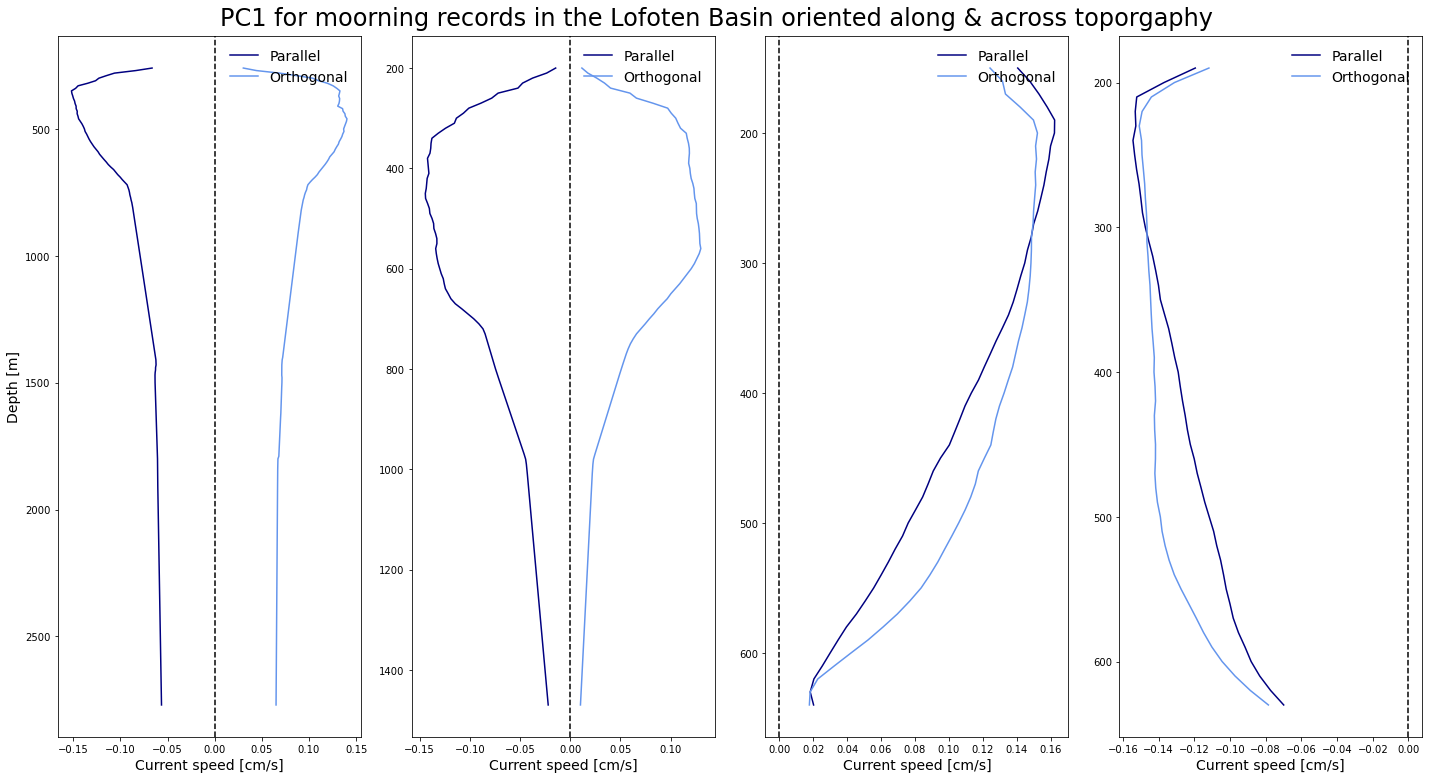

In [37]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(20,11))
yl = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
ml = [(923, 155),(935, 143),(938, 144),(934, 141)] #ml[0] er endret for å passe griddsystemet fra (915,157)
plt.suptitle('PC1 for moorning records in the Lofoten Basin oriented along & across toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    m = ml[i]
    U =y[0]
    V = y[1]
    x = m[0]
    y = m[1]
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.DEPTH, label= 'Parallel', color='navy')
    axs.plot(PCo,V.DEPTH, label= 'Orthogonal', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

plt.savefig('PC1_Lofoten_par_ort.pdf', dpi = 300)

Denne kræsjer, hvorfor? eller tar den bare evig lang tid i forhold? .T problem igjen? 

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
yl = [(u1,v1),(u2,v2),(u3,v3)]
ml = [(774, 344),(766, 358),(773, 346)]
plt.suptitle('PC1 for moorning records at Yermark shelf oriented along & across toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    U =y[0]
    V = y[1]
    m = m_l[i]
    x = m[0]
    y = m[1]
    
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.DEPTH*4, label= 'Parallel', color='navy')
    axs.plot(PCo,V.DEPTH*4, label= 'Orthogonal', color='cornflowereblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

plt.savefig('PC1_Yermark_par_ort.pdf', dpi = 300)

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
ANO = [(u12,v12),(u14,v14),(u16,v16),(u18,v18)]
ml = [(334, 978),(334, 978),(334, 978),(334, 978)]
plt.suptitle('PC1 for moorning records at Beaufort sea oriented along & across toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(ANO))):
    y = ANO[i]
    U =y[0]
    V = y[1]
    m = ml[i]
    x = m[0]
    y = m[1]
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.BINDEPTH, label='Parallel', color='navy')
    axs.plot(PCo,V.BINDEPTH, label='Orthogonal', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

plt.savefig('PC1_Beaufort_par_ort.pdf', dpi = 300)

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
CC = [(ue40,ve40),(ue50,ve50),(ue60,ve60),(uw40,vw40),(uw50,vw50)]
ml = [(334, 978),(334, 978),(334, 978),(334, 978)]
plt.suptitle('PC1 for moorning records at ChunkChi sea oriented along & across toporgaphy', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(CC))):
    y = CC[i]
    U =y[0]
    V = y[1]
    m = ml[i]
    x = m[0]
    y = m[1]
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.z, label='Parallel', color='navy')
    axs.plot(PCo,V.z, label='Orthogonal', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

plt.savefig('PC1_Chuckchi_par_ort.pdf', dpi = 300)